# Matplotlib

In this section, we will introduce matplotlib, the most mature Python package for plotting data and images. It is designed to work nicely with NumPy arrays, and natively uses two and three-dimensional arrays to represent images. This section will introduce basics of plotting and key features of matplotlib. For a more in-depth look at the package, consult [matplotlib user's guide](https://matplotlib.org/users/index.html), as well as their [tutorials](https://matplotlib.org/2.0.2/users/tutorials.html).

matplotlib is included in the Anaconda distribution of Python packages. The pyplot submodule of matplotlib  contains all of the essential plotting functionality, thus we will always need to import pyplot. It is standard to utilize the abbreviation "plt" when importing the pyplot submodule from matplotlib:

```python
# import matplotlib's pyplot submodule
import matplotlib.pyplot as plt
```

There are many tutorials and examples available online, which demonstrate mathplotlib's wide range of capabilities for visualizing data. Here, we will only distill the essentials needed for understanding how to use matplotlib effectively for typical data science applications.

## Plotting in Jupyter Notebooks
While matplotlib provides a graphical interface for plots so that we can plot data from the Python shell or IPython, the Jupyter notebook is the ideal environment for creating and refining data visualizations. The command `%matplotlib notebook`, when executed in a notebook, will instruct matplotlib to embed its plots within that notebook, rather than opening a separate window for each plot.

```python
# instructs Jupyter to embed plots within a notebook
%matplotlib notebook
```
This will also allow us to interact with the plots the render within the notebook, enabling panning, zooming, and saving. We will proceed with this section with the assumption that we are embedding our plots in a notebook. Finally, note that `%matplotlib notebook` is not a valid line of Python code, rather it is an example of a ["magic command"](http://ipython.readthedocs.io/en/stable/interactive/magics.html) which is reserved to affect the behavior of the IPython console and Jupyter notebook.

## Creating Figures and Axes with `pyplot.subplots`
Here, we will introduce the function `subplots`, which creates a figure that contains axes on which data is plotted. We will see that the keyword argument `figsize` can be used to control the size of the figure, which the keyword arguments `ncols` and `nrows` can be used to specify the grid on which pairs of axes will be laid out within the figure.

In matplotlib, the `Figure` object is used to contain one or more sets of `Axes` objects. Data is plotted within a given set of axes. The `subplots` function can be used to create a figure along with a specified layout of axes. By default, `subplots` will create a figure with a single set of axes; calling it will return the figure object and its axes object in a tuple:

```python
import matplotlib.pyplot as plt
%matplotlib notebook

# Creating a figure that contains a single
# set of axes. These objects are returned
# as a tuple
fig, ax = plt.subplots()
```
Executing this code will open a figure with a blank set of axes. We can use the axes object, `ax`, to plot data, add labels and a title to the plot, and add grid lines. Let's plot a single period of a sine wave.

<IPython.core.display.Javascript object>


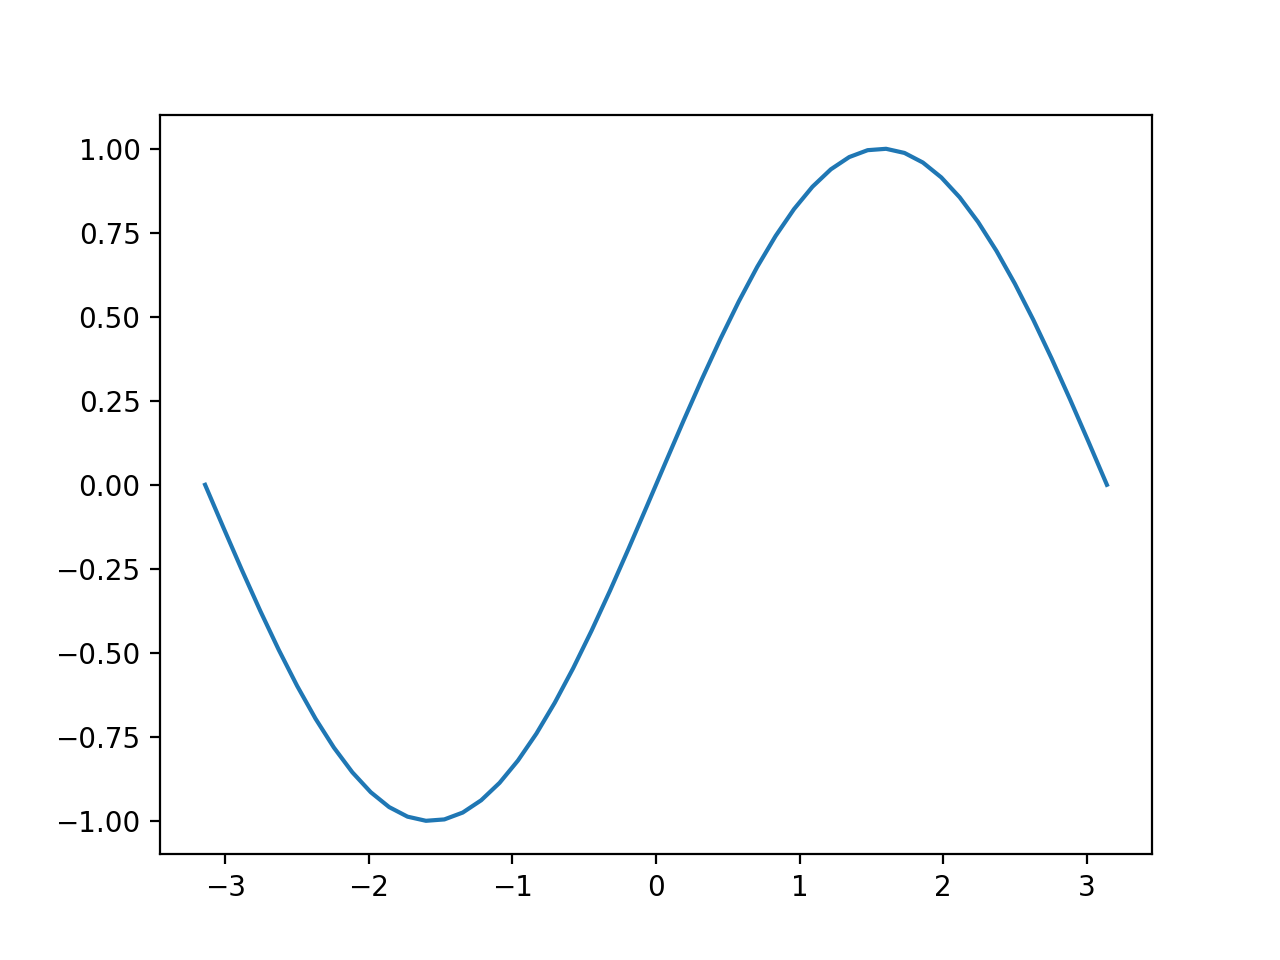

In [71]:
# using subplots to create a figure with a singe set of axes
# plotting points on a sine curve

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


# create a figure and set of axes
fig, ax = plt.subplots()

# prepare 50 x-coordinates and 50 y-coordinates
x = np.linspace(-np.pi, np.pi, 50)
y = np.sin(x)

# Plot data on the axes object.
# Plots corresponding x-y coordinate pairs,
# specified by the x-coordinates in `x`
# and the y-coordinates in `y`
ax.plot(x, y)

The `subplots` function can be fed the keyword argument `figsize` to control the size of the figure; this accepts a tuple of the width and height of the figure, in inches. The axes objects will stretch to fill the figure size.

<IPython.core.display.Javascript object>


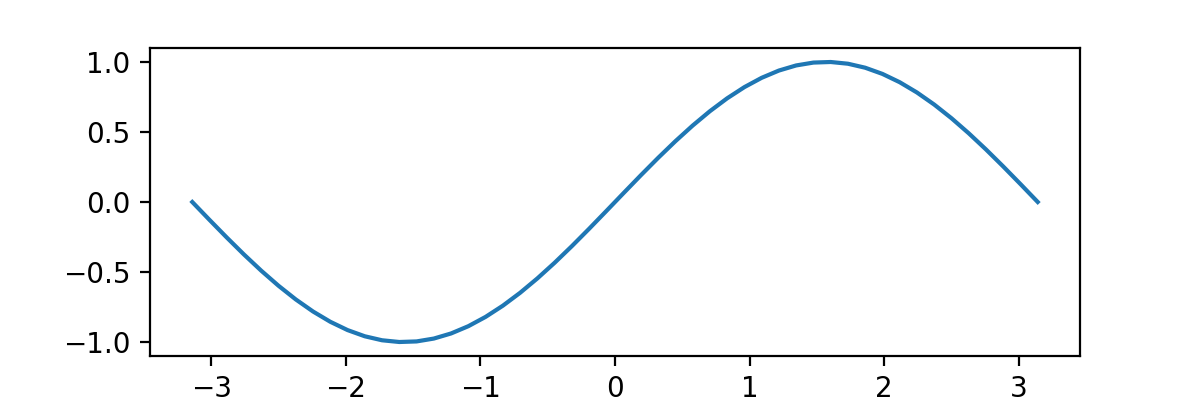

In [74]:
# specify the figure size created by `subplots`
# create a 2-inch x 3-inch figure
fig, ax = plt.subplots(figsize=(6,2))
ax.plot(x, y)

The keyword arguments `nrows` and `ncols` instructs the figure to contain `nrows x ncols` number of axes objects, laid out in a commensurate grid. In this case the second item returned in the tuple by `subplots` is not a single axes object, but instead a 2-dimensional NumPy array of shape `(nrows, ngrids)`, containing the corresponding axes arguments.

Let's create a figure with size sets of axes, laid out in a $2 x 3$ grid:

<IPython.core.display.Javascript object>


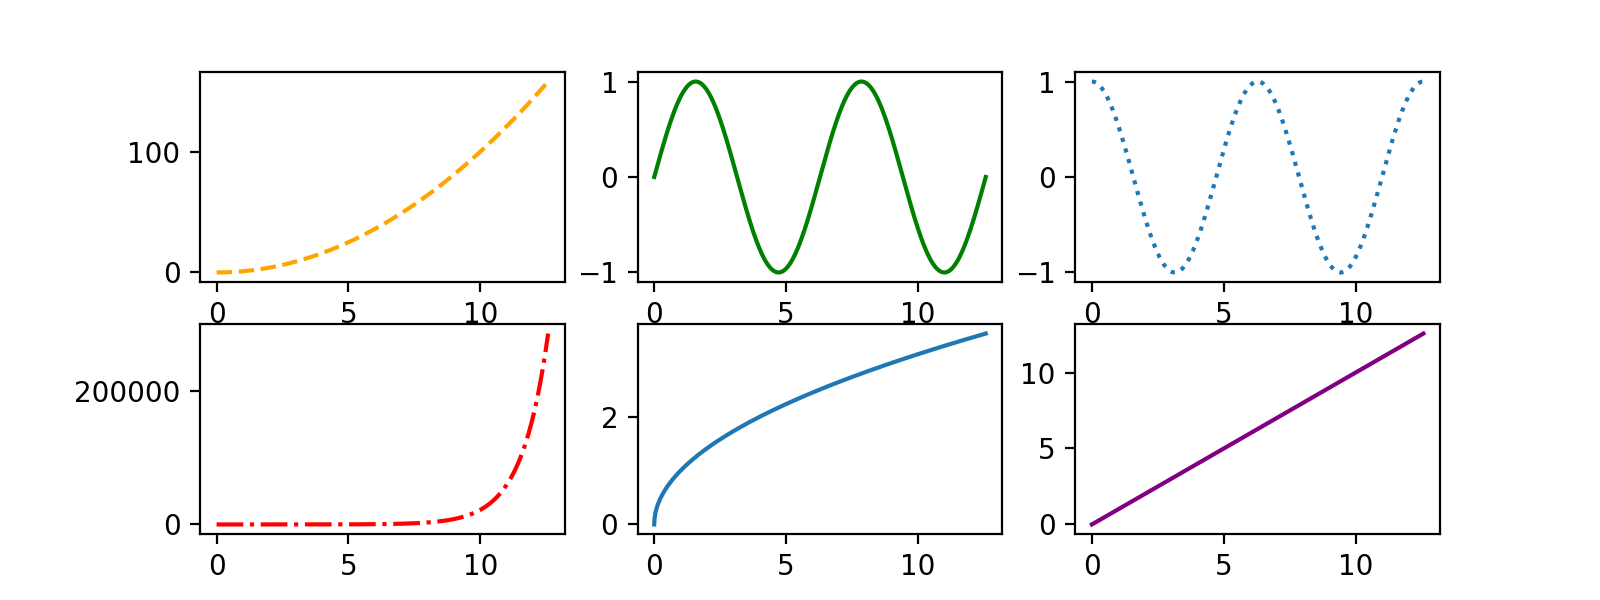

In [78]:
# create a figure with multiple axes
fig, axs = plt.subplots(2, 3, figsize=(8, 3)) # 6 axes on a 2x3 grid
# note that we could also use tuple unpacking for our axes:
# fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(2, 3)

x = np.linspace(0, 4*np.pi, 1000)
axs[0, 0].plot(x, x**2, linestyle='--', color='orange')
axs[0, 1].plot(x, np.sin(x), color='green')
axs[0, 2].plot(x, np.cos(x), linestyle=':')
axs[1, 0].plot(x, np.exp(x), color='red', linestyle='-.')
axs[1, 1].plot(x, np.sqrt(x))
axs[1, 2].plot(x, x, color='purple');

### The Axes Object

The axes object is used to control the appearance of data within a plot. A quick glance at the [official documentation for the axes object](https://matplotlib.org/api/axes_api.html) reveals that it is "one object to rule them all" in matplotlib. It permits us to control the type of plotting being performed; the following is not an exhaustive list of the various types of plots that can be created:

- `Axes.plot`: lines with data markers
- `Axes.scatter`: a scatter plot of x-y markers, without lines
- `Axes.hist`: a histogram
- `Axes.bar`: a bar chart
- `Axes.pie`: a pie chart
- `Axes.imshow`: draw an image within the axes
- `Axes.contour`: create a contour plot

Furthermore, the axes object controls the scales of the axes (e.g. log-scaling versus linear-scaling), it permits us to create axis labels, a title, and to affect smaller details like a plot's grid lines, tick-mark spacing, and many other items. In summary, you will be using the axes object to affect most aspects of your plot. For this reason, it is highly recommended that you familiarize yourself with the functions available to the axes object. We will only be able to demonstrate a fraction of its capabilities here; we will prioritize its most essential features, and will create diverse plots in doing so.

As seen in the previous example, `ax.plot` creates a plot with line-segments joining the the specified data points. See that, by default, it does not plot markers for each data point being plotted. We can use the `marker` and `linestyle` keyword arguments to specify the appearance of the markers for the data point, and the line segments that connect them, respectively. The available marker styles can be found [here](https://matplotlib.org/api/markers_api.html#markers), and the available line styles can be found [here](https://matplotlib.org/devdocs/gallery/lines_bars_and_markers/line_styles_reference.html).

Invoking `ax.plot` will plot multiple sets of data within the same axes; matplotlib will automatically cycle through colors to make distinct each set of data being plotted. We can provide a label for each data set, and use `ax.legend()` to display the labels.

<IPython.core.display.Javascript object>


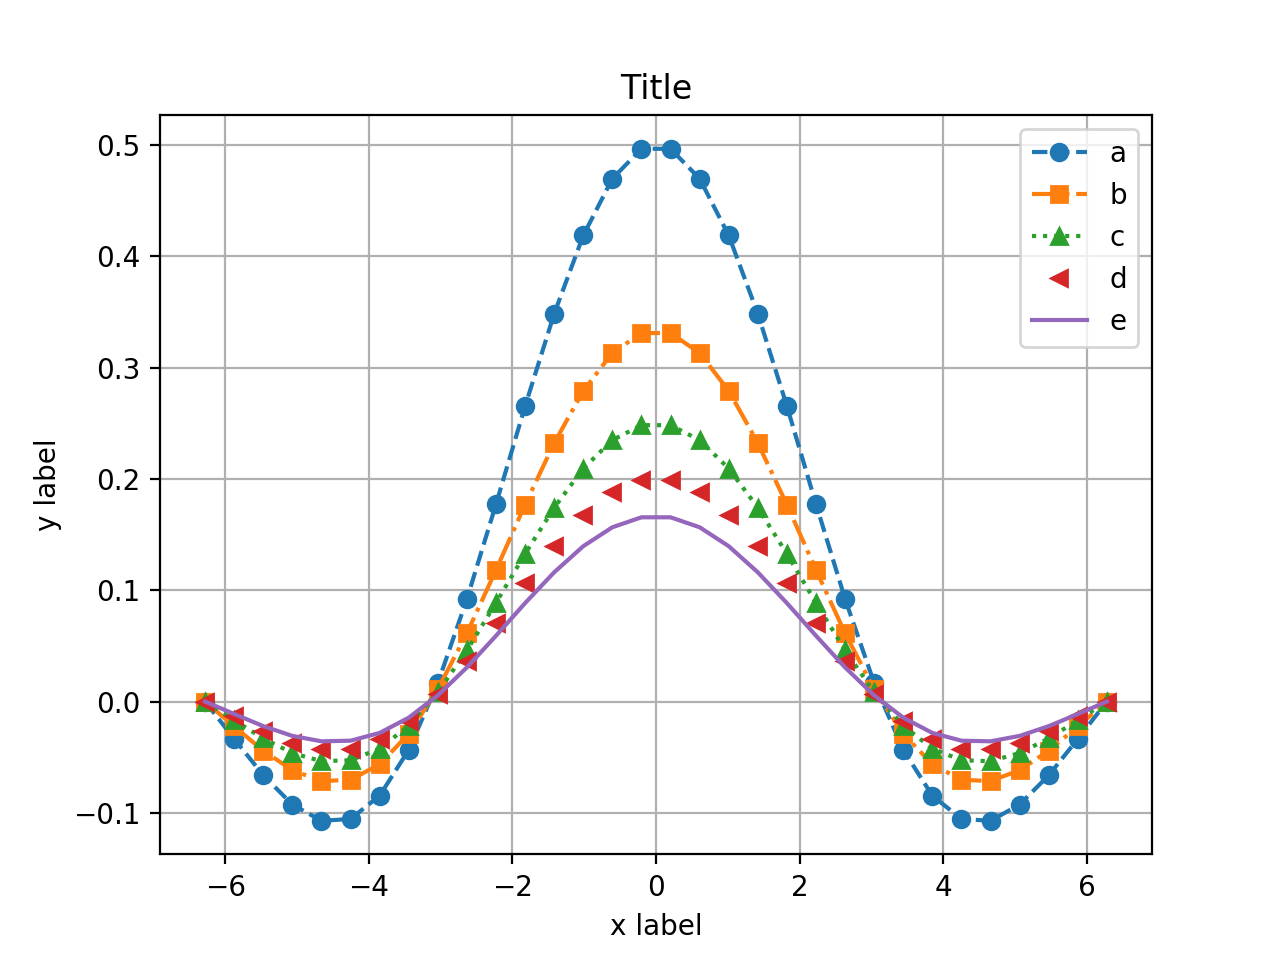

In [116]:
# demonstrating wide range of functionality controlled
# by the axes object.

# create a set of axes with multiple plots
fig, ax = plt.subplots()

x = np.linspace(-2*np.pi, 2*np.pi, 32)

# circles with a dashed line
ax.plot(x, np.sin(x)/(2*x), marker="o", linestyle="--", label='a')

# squares with a dash-dot line
ax.plot(x, np.sin(x)/(3*x), marker="s", linestyle="-.", label='b')

# upward triangles with a dotted line
ax.plot(x, np.sin(x)/(4*x), marker="^", linestyle=":", label='c')

# sideways triangles with no line
ax.plot(x, np.sin(x)/(5*x), marker="<", linestyle="", label='d')

# default: solid line with no markers
ax.plot(x, np.sin(x)/(6*x), label='e')

# add legend of labels to top-right
ax.legend(loc="upper right")

# annotate the axes with labels and a title
ax.set_xlabel("x label")
ax.set_ylabel("y label")
ax.set_title("Title")

# turn on x-y grid lines
ax.grid(True) 

Now, we provide a potpourri of different plots that can be created via the axes object. The resulting $2 \times 3$ grid of plots demonstrates the following:

**Plot (0, 0)**

- Using `Axes.set_yscale` to set the y-axis scale a logarithmic scale.
- Using LaTeX-formatted equations as labels.

**Plot (0, 1)**

- Using `Axes.fill_between` to shade in the bounds between the error bars for a curve. 
- The `alpha` keyword arguments allows you to set the transparency level for the shading.
- Specifying `color=C0` allows you to match the color-0 from matplotlib's default color cycle.

**Plot (0, 2)**

- Use `Axes.errorbar` to plot a curve with discrete error bars.

**Plot (1, 0)**

- Use `Axes.scatter` to plot markers for two sets of x-y coordinates, without joining the markers with line segments.

**Plot (1, 1)**

- Use `Axes.hist` to create a histogram, with 50 bins, for Gaussian-distributed data. 

**Plot (1, 2)**

- Use `Axes.imshow` to plot a matrix (a 2D NumPy array) as an image. The matrice's entries take on random values, and the lower triangular half of the matrice's entries are set to 0.
- The magnitude of the entries are conveyed using matplotlib's default viridis colormap.

<IPython.core.display.Javascript object>


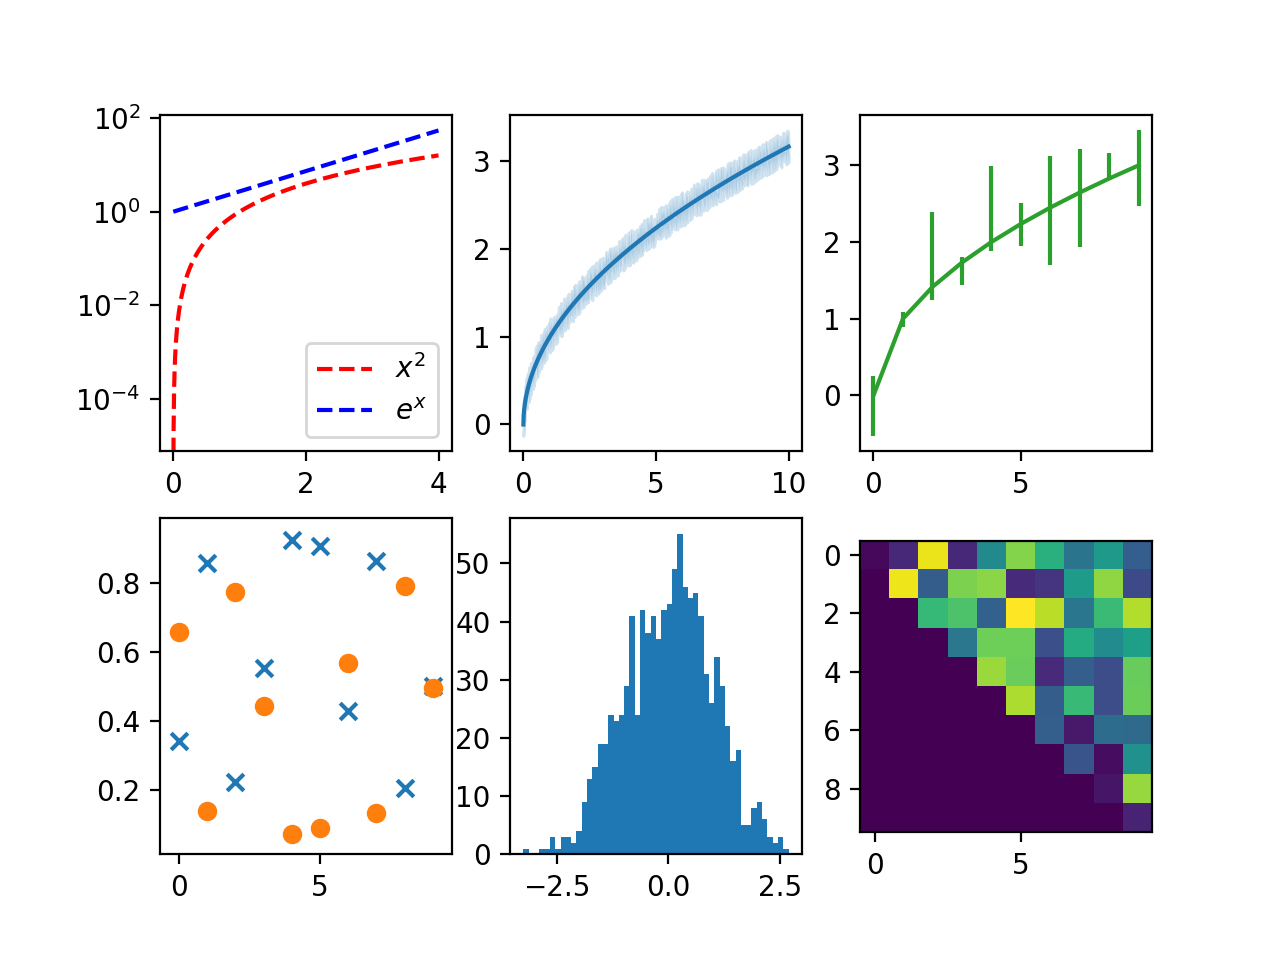

In [133]:
# demonstrating a variety of plots, in a 2x3 grid
fig, axs = plt.subplots(nrows=2, ncols=3)

################# Plot (0, 0) ##########################
x = np.linspace(0, 4, 1000)
y = x**2
axs[0, 0].plot(x, y, linestyle='--', color='red', label=r'$x^2$')
axs[0, 0].plot(x, np.exp(x), linestyle='--', color='blue', label=r'$e^x$')
axs[0, 0].set_yscale("log")
axs[0, 0].legend()


################# Plot (0, 1) ##########################
# demonstrating `ax.fill_between`, and `alpha`
x = np.linspace(0, 10, 1000)
y = np.sqrt(x)
err_lower, err_upper = np.random.random((2, 1000))*0.2  # create the error bars
axs[0, 1].plot(x, y)

# fill between: (y - err_lower) and (y + err_upper)
axs[0, 1].fill_between(x, y-err_lower, y+err_upper, color='C0', alpha=0.2)


################# Plot (0, 2) ##########################
# Demonstrating an errorbar plot
x = np.arange(10)
y = np.sqrt(x)

# each y has an associated lower and upper error bound,
# separated by row in a 2D array
yerr = np.random.random((2, 10)) 
axs[0, 2].errorbar(x, y, yerr, color="C2")


################# Plot (1, 0) ##########################
# Demonstrating a scatter plot
x = np.arange(10)
y = np.random.random(10)
axs[1, 0].scatter(x, y, marker='x')
axs[1, 0].scatter(x, 1-y, marker='o')


################# Plot (1, 1) ##########################
# Demonstrating a historgram
data = np.random.randn(1000)  # draw from Gaussian distribution
axs[1, 1].hist(data, bins=50)


################# Plot (1, 2) ##########################
# Plotting the entries of a 2D array as an image.

# random 10x10 matrix with lower "half" set to 0
matrix = np.triu(np.random.rand(10, 10)) 
axs[1, 2].imshow(matrix);

    

TODO: 
- mention bokeh and ???
- move figure saving up

## Displaying Images

Matplotlib also provides functionality for displaying images. Here, 'image' can be anything that "looks like" an image. For example, a 2D array can be interpreted as a grayscale image where the rows and columns are pixel locations and the values are intensity. An image can also be $r \times c \times 3$, where $r$ and $c$ correspond to row and column and 3 indicates 3 channels for red, green, and blue (RGB) pixel values.

Lets plot some of these:

<IPython.core.display.Javascript object>


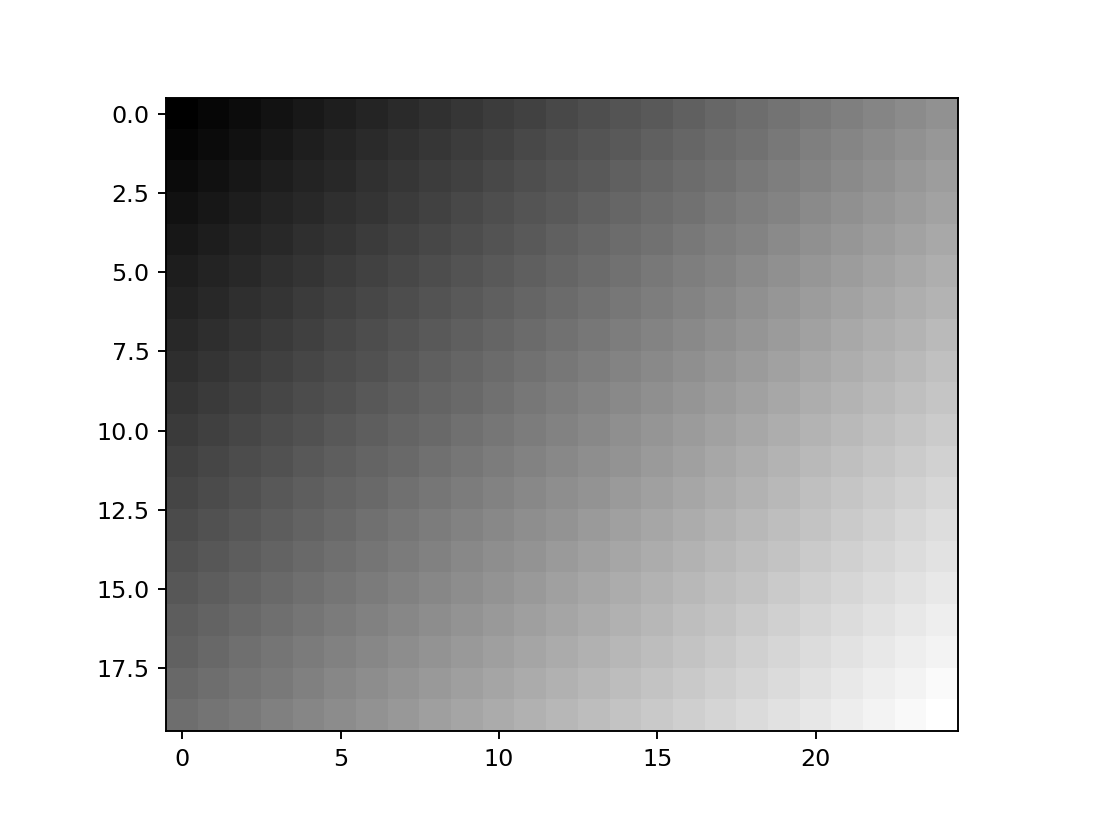

In [9]:
# generate and display a grayscale image
fig, ax = plt.subplots()
my_image = np.array([i+np.linspace(0, 25, 25) for i in range(20)])
plt.imshow(my_image, cmap='gray'); # cmap chooses a color map

<IPython.core.display.Javascript object>


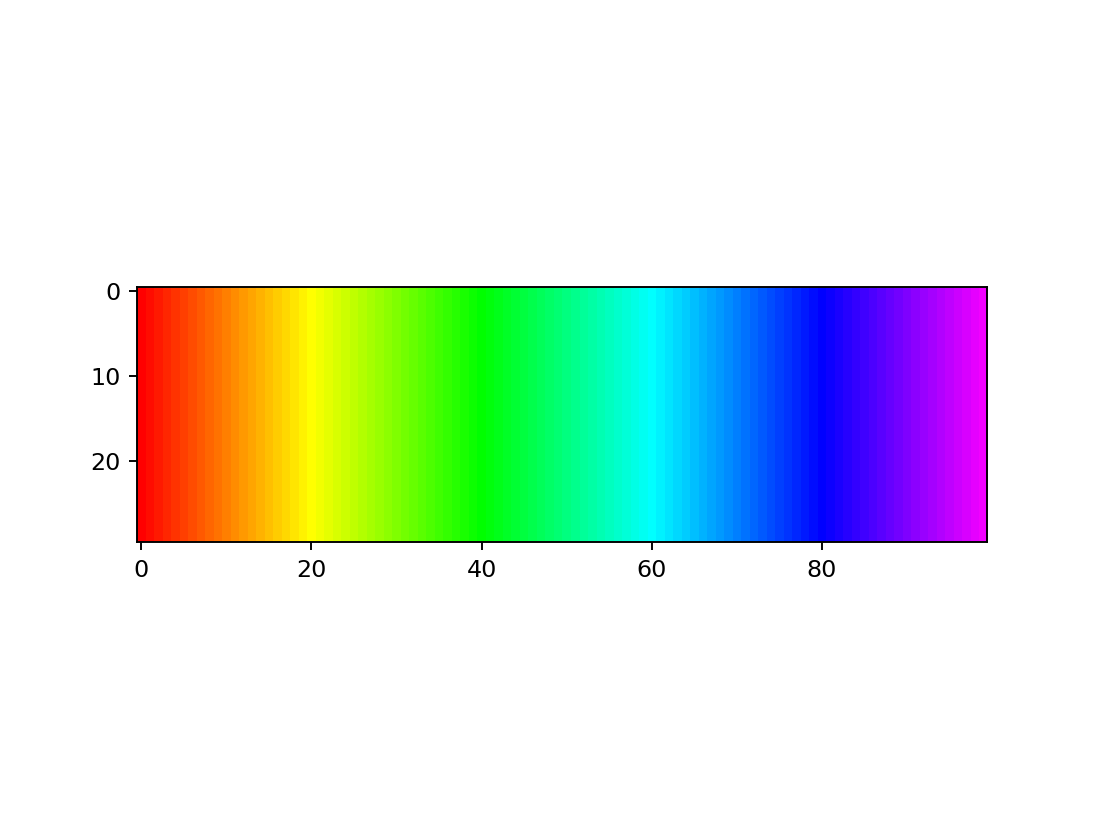

In [10]:
# generate and display an RGB image
my_image = np.zeros((30, 100, 3)) # my_image is 30x100x3

r = [255 for i in range(20)] + \
    [255-12.75*i for i in range(20)] + \
    [0 for i in range(40)] + \
    [12.75*i for i in range(20)]
    
g = [12.75*i for i in range(20)] + \
    [255 for i in range(40)] + \
    [255-12.75*i for i in range(20)] + \
    [0 for i in range(20)]
    
b = [0 for i in range(40)] + \
    [12.75*i for i in range(20)] + \
    [255 for i in range(40)]

# set the red channel values
my_image[:,:,0] = [r for _ in range(30)]

# set the green channel values
my_image[:,:,1] = [g for _ in range(30)]

# set the blue channel values
my_image[:,:,2] = [b for _ in range(30)]

my_image = my_image.astype('uint8')

fig, ax = plt.subplots()
ax.imshow(my_image);

## Saving Figures
Once we have created a `figure`, matplotlib can be used to save it:

<IPython.core.display.Javascript object>


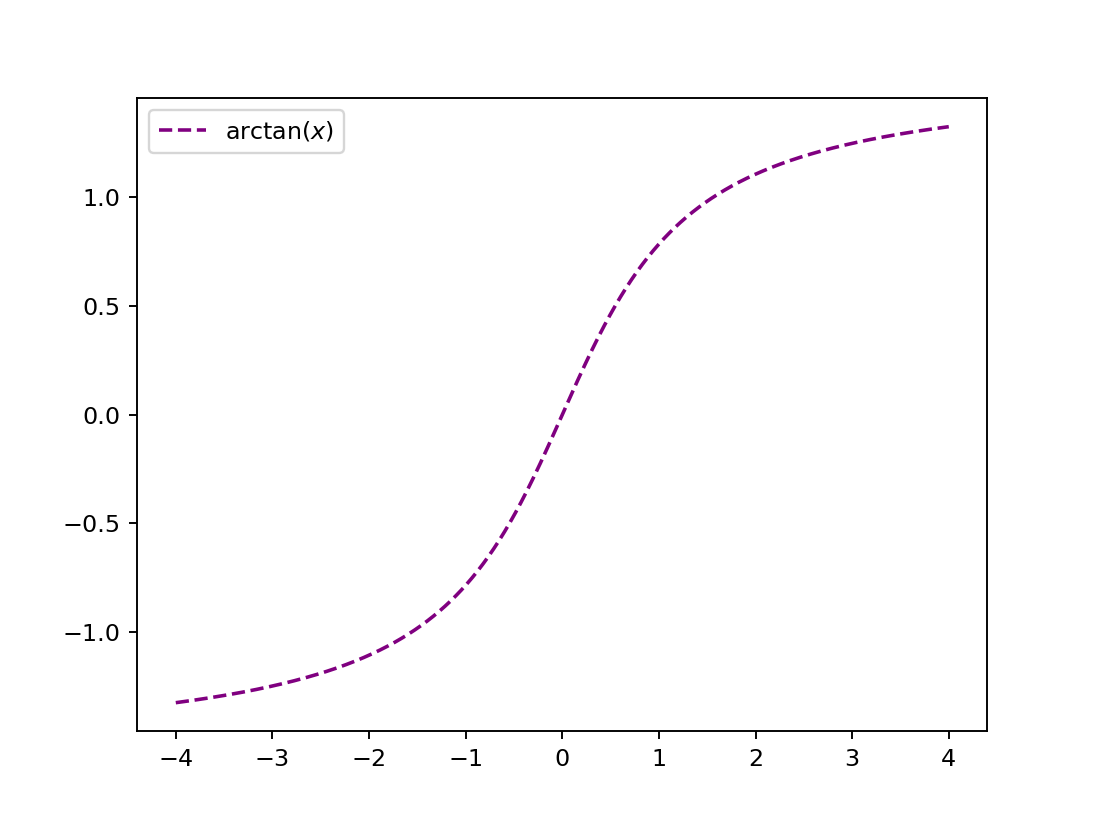

In [11]:
fig, ax = plt.subplots()

x = np.linspace(-4, 4, 1000)
y = np.arctan(x)
ax.plot(x, y, linestyle='--', color='purple', label=r'$\arctan(x)$')
ax.legend()

fig.savefig('arctan_figure.png')

We can also save images:

In [12]:
# saving the image we generated above
plt.imsave('color_gradient.png', my_image)

Of course, we can also load images with matplotlib:

<IPython.core.display.Javascript object>


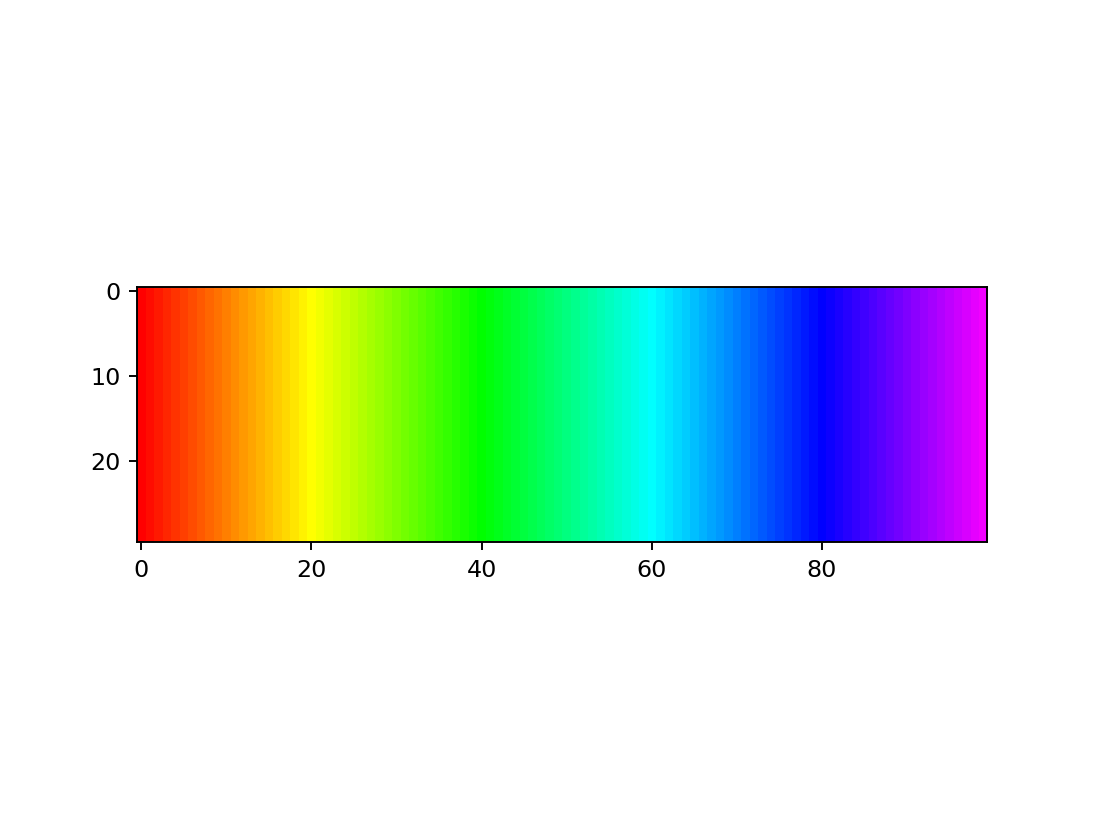

In [13]:
# loading an image
img = plt.imread('color_gradient.png')

fig, ax = plt.subplots()
ax.imshow(img);

There are a lot more functions in matplotlib, and a lot more functionality to explore. The basics of matplotlib that we've covered here should be sufficient for getting you started with plotting. The [matplotlib documentation](https://matplotlib.org/contents.html) can serve as a reference for additional exploration of the library.